## Word 2 Vec

In [7]:
filename="C:/Users/D072202/test.csv"
tuples = list()
filename2="C:/Users/D072202/test2.csv"
file = open(filename2,"w+", encoding="UTF-8")
with open(filename, mode="r", encoding="UTF-8") as f:
    for line in f:
        line = line.split(" ")
        for word in line:
            if not word == line[0] and not "<>" in word:
                l = line[0] + "," + word.replace("\n","") + "\n"
                file.write(l.replace('[',"").replace(']','').replace('\'','').replace(' ',''))
print("done")

done


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(filename2,header=None)

In [3]:
df = data

In [4]:
data.head()

,0,1
0,http://rdata2graph.sap.com/hilti_erp/chuck#464...,<ch
1,http://rdata2graph.sap.com/hilti_erp/chuck#464...,http://rdata2graph.sap.com/hilti_erp/chuck#464...
2,http://rdata2graph.sap.com/hilti_erp/chuck#464...,chu
3,http://rdata2graph.sap.com/hilti_erp/chuck#464...,http://rdata2graph.sap.com/hilti_erp/chuck#464...
4,http://rdata2graph.sap.com/hilti_erp/chuck#464...,huc


In [5]:
df[:5]

,0,1
0,http://rdata2graph.sap.com/hilti_erp/chuck#464...,<ch
1,http://rdata2graph.sap.com/hilti_erp/chuck#464...,http://rdata2graph.sap.com/hilti_erp/chuck#464...
2,http://rdata2graph.sap.com/hilti_erp/chuck#464...,chu
3,http://rdata2graph.sap.com/hilti_erp/chuck#464...,http://rdata2graph.sap.com/hilti_erp/chuck#464...
4,http://rdata2graph.sap.com/hilti_erp/chuck#464...,huc


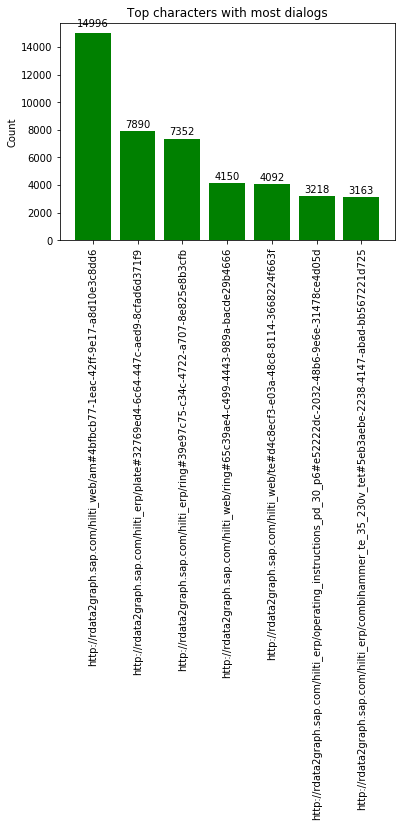

In [6]:
# for labeling in plotting
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

topchar=df.loc[df[1]!='<>'][1].value_counts()[:7]
labels=np.array(topchar.keys())
values=np.array(topchar)
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_ylabel("Count")
ax.set_title("Top characters with most dialogs")
autolabel(rects)
plt.show()

In [38]:
import collections
# sentences to words and count
count= collections.Counter(df[1]).most_common() 
print ("Word count", count[:5])

Word count [('assy', 101), ('te', 84), ('case', 59), ('set', 57), ('kit', 42)]


In [39]:
# Build dictionaries
unique_words =  [i[0] for i in count]
dic = {w: i for i, w in enumerate(unique_words)} #dic, word -> id cats:0 dogs:1 ......
voc_size = len(dic)

In [40]:
voc_size

14468

In [41]:
words = df[1].tolist()

In [42]:
# Make indexed word data
data = [dic[word] for word in df[1].tolist()] #count rank for every word in words
print('Sample data', data[:10], df[1].tolist()[:10])

Sample data [20, 615, 1461, 615, 1462, 615, 355, 615, 2185, 616] ['bit', 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d', 'holder', 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d', 'sbh', 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d', 'm', 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d', '75/3', 'http://rdata2graph.sap.com/hilti_erp/lamp_230_v_green#5237e9bc-bfe3-48b8-b57e-40b0573cc302']


In [43]:
# Let's make a training data for window size 1 for simplicity

cbow_pairs = []
for i in range(1, len(data)-1) :
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]]);
    
print('Context pairs rank ids', cbow_pairs[:5])
print()

cbow_pairs_words = []
for i in range(1, len(words)-1) :
    cbow_pairs_words.append([[words[i-1], words[i+1]], words[i]]);
print('Context pairs words', cbow_pairs_words[:5])

Context pairs rank ids [[[20, 1461], 615], [[615, 615], 1461], [[1461, 1462], 615], [[615, 615], 1462], [[1462, 355], 615]]

Context pairs words [[['bit', 'holder'], 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d'], [['http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d', 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d'], 'holder'], [['holder', 'sbh'], 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d'], [['http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d', 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d'], 'sbh'], [['sbh', 'm'], 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d']]


In [44]:
# Let's make skip-gram pairs
# (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
skip_gram_pairs=[]

for c in cbow_pairs:
    skip_gram_pairs.append([c[1],c[0][0]])
    skip_gram_pairs.append([c[1],c[0][1]])
print('skip-gram pairs', skip_gram_pairs[:5])
print()
skip_gram_pairs_words=[]
for c in cbow_pairs_words:
    skip_gram_pairs_words.append([c[1],c[0][0]])
    skip_gram_pairs_words.append([c[1],c[0][1]])
print('skip-gram pairs words', skip_gram_pairs_words[:5])

skip-gram pairs [[615, 20], [615, 1461], [1461, 615], [1461, 615], [615, 1461]]

skip-gram pairs words [['http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d', 'bit'], ['http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d', 'holder'], ['holder', 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d'], ['holder', 'http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d'], ['http://rdata2graph.sap.com/hilti_erp/holder#e4c66968-b39d-4c82-b34d-6f56a20d904d', 'holder']]


In [45]:
def get_batch(size):
    assert size<len(skip_gram_pairs)
    X=[]
    Y=[]
    rdm = np.random.choice(range(len(skip_gram_pairs)),size,replace=False)
    
    for r in rdm:
        X.append(skip_gram_pairs[r][0])
        Y.append([skip_gram_pairs[r][1]])
    return X , Y

# generate_batch test
print ('Batches (x, y)', get_batch(3))

Batches (x, y) ([2269, 1049, 6276], [[226], [416], [6277]])


In [47]:
#tensor flow code
import tensorflow as tf

batch_size = 20
embedding_size = 2
num_sampled = 15    # Number of negative examples to sample.

X= tf.placeholder(tf.int32,shape=[batch_size]) #inputs
Y= tf.placeholder(tf.int32,shape=[batch_size,1]) #labels

with tf.device("/cpu:0"):
      # Look up embeddings for inputs.
    embeddings = tf.Variable(tf.random_uniform([voc_size,embedding_size],-1.0,1.0))
    embed = tf.nn.embedding_lookup(embeddings, X) # lookup table
    
# Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size],-1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# Compute the average NCE loss for the batch.
# This does the magic:
#   tf.nn.nce_loss(weights, biases, inputs, labels, num_sampled, num_classes ...)
# It automatically draws negative samples when we evaluate the loss.
loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, Y, embed, num_sampled, voc_size))
# Use the adam optimizer
optimizer = tf.train.AdamOptimizer(1e-1).minimize(loss)

In [68]:
import numpy
X

<tf.Tensor 'Placeholder_4:0' shape=(20,) dtype=int32>

In [65]:
epochs=10000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        
        batch_inputs, batch_labels = get_batch(batch_size)
        _,loss_val=sess.run([optimizer,loss],feed_dict = {X : numpy.array(batch_inputs), Y : numpy.array(batch_labels) })
        
        if epoch % 1000 == 0:
            print("Loss at ", epoch, loss_val) # Report the loss
    
    # Final embeddings are ready for you to use. Need to normalize for practical use
    trained_embeddings = embeddings.eval()
    

import matplotlib.pyplot as plt
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = unique_words[:50] # Show top 10 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    #plt.savefig("word2vec.png")
    plt.show()

TypeError: TF_SessionRun_wrapper: expected all values in input dict to be ndarray

In [ ]:
import matplotlib.pyplot as plt
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = unique_words[30:60] # Show top 10 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    #plt.savefig("word2vec.png")
    plt.show()